## Exercise09 : Data Visualization I

Given the following dataset has been stored in the file `data/week04/weather.csv`. The given data for this exercise comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](../../data/week04/weather_readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **s_id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element_type** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this exercise, your tasks are:

1. Read the documentation and familiarize yourself with the dataset.
2. Use python code to plot a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
3. Plot scatter plot of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
4. To remove leap year date i.e. 29th February points from the dataset for the purpose of this visualization.
5. Figures should be based on good data visualization practices. Issues such as legends, labels, and chart junk should be considered.

The stations data you have been given is near **Ann Arbor, Michigan, United States**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Lau Chong Ee\\Desktop\\EDS4\\Content\\week04\\Exercise'

In [97]:
# read the data
path = '..\..\data\week04\weather.csv'

data = pd.read_csv(path)
data

,s_id,date,element_type,value
0,USW00094889,11/12/14,TMAX,22
1,USC00208972,4/29/09,TMIN,56
2,USC00200032,5/26/08,TMAX,278
3,USC00205563,11/11/05,TMAX,139
4,USC00200230,2/27/14,TMAX,-106
5,USW00014833,10/1/10,TMAX,194
6,USC00207308,6/29/10,TMIN,144
7,USC00203712,10/4/05,TMAX,289
8,USW00004848,12/14/07,TMIN,-16
9,USC00200220,4/21/11,TMAX,72


In [99]:
#convert date object to datetime
data['date'].dtype # an object
data = data[(data['s_id'] == 'USW00094889')]
data['date'] = pd.to_datetime(data['date'])

In [100]:
#sort the value by station identification code and date
data.sort_values(['s_id','date'], ascending=True, inplace=True)

convert = lambda x:x*0.1
data['temp'] = data['value'].apply(convert)
data

,s_id,date,element_type,value,temp
24805,USW00094889,2005-01-01,TMIN,-56,-5.6
24863,USW00094889,2005-01-01,TMAX,44,4.4
74019,USW00094889,2005-01-02,TMIN,-6,-0.6
74020,USW00094889,2005-01-02,TMAX,106,10.6
116248,USW00094889,2005-01-03,TMIN,6,0.6
116249,USW00094889,2005-01-03,TMAX,22,2.2
49700,USW00094889,2005-01-04,TMAX,17,1.7
49852,USW00094889,2005-01-04,TMIN,-6,-0.6
17332,USW00094889,2005-01-05,TMAX,-6,-0.6
17475,USW00094889,2005-01-05,TMIN,-56,-5.6


In [94]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165004 entries, 55067 to 61135
Data columns (total 5 columns):
s_id            165004 non-null object
date            165004 non-null datetime64[ns]
element_type    165004 non-null object
value           165004 non-null int64
temp            165004 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 7.6+ MB


In [104]:
data['date'].year

AttributeError: 'Series' object has no attribute 'year'

In [105]:
# remove the leap year date, 29th February
data = data[(data['date'] != pd.to_datetime('01/04/2006')) & (data['date'] != pd.to_datetime('01/05/2006')) ]

# data1 = data
# data2 = data

# mask = data1['s_id'] == 'USW00094889' 
# data1 = data1[mask]
# mask1 = data1['date'].dt.year != 2015
# data1 = data1[mask1]
# mask2 = ~((data1['date'].dt.day == 29) & (data1['date'].dt.month == 2))
# data1 = data1[mask2]

data1 = data[(data['date'].dt.year != 2015) & ~((data['date'].dt.day == 29) & (data['date'].dt.month == 2))]
data1

,s_id,date,element_type,value,temp
24805,USW00094889,2005-01-01,TMIN,-56,-5.6
24863,USW00094889,2005-01-01,TMAX,44,4.4
74019,USW00094889,2005-01-02,TMIN,-6,-0.6
74020,USW00094889,2005-01-02,TMAX,106,10.6
116248,USW00094889,2005-01-03,TMIN,6,0.6
116249,USW00094889,2005-01-03,TMAX,22,2.2
49700,USW00094889,2005-01-04,TMAX,17,1.7
49852,USW00094889,2005-01-04,TMIN,-6,-0.6
17332,USW00094889,2005-01-05,TMAX,-6,-0.6
17475,USW00094889,2005-01-05,TMIN,-56,-5.6


KeyError: 'TMAX'

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

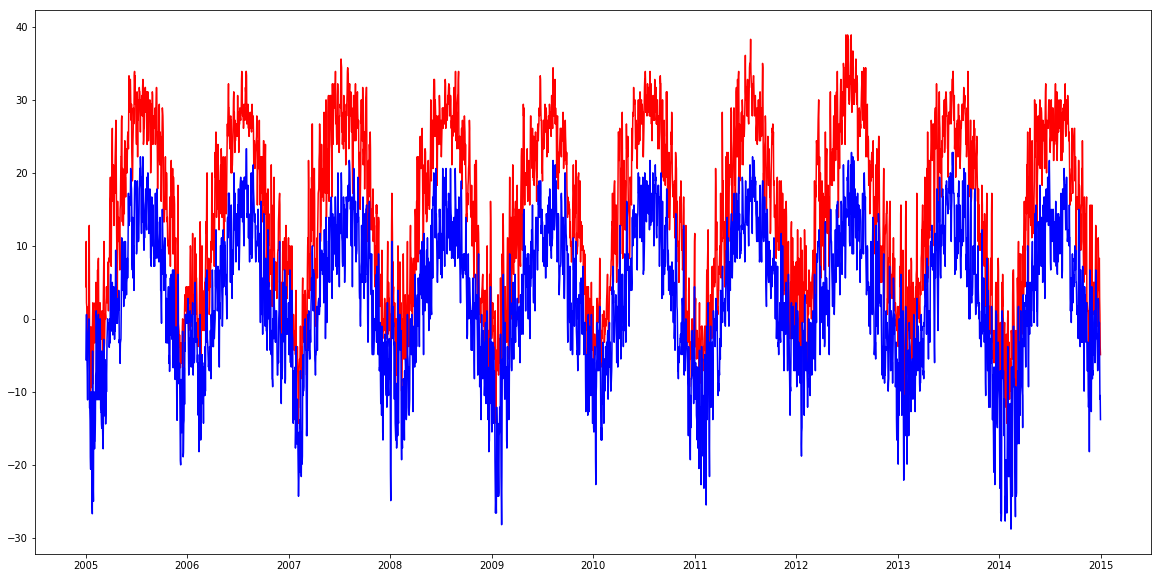

In [106]:
# plot a line graph of the record high and record low 
# temperatures by day of the year over the period 2005-2014

fig, ax = plt.subplots(figsize=(20,10))
df_tmax = data1[data1['element_type'] == 'TMAX']
df_tmin = data1[data1['element_type'] == 'TMIN']

ax.plot(df_tmax['date'], df_tmax['temp'], color='red')
ax.plot(df_tmin['date'], df_tmin['temp'], color='blue')

ax.fill_between(data1['date'].unique, df_tmax['temp'].values, df_tmin['temp'].values, color='green', alpha=0.5)

#fig.tight_layout()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

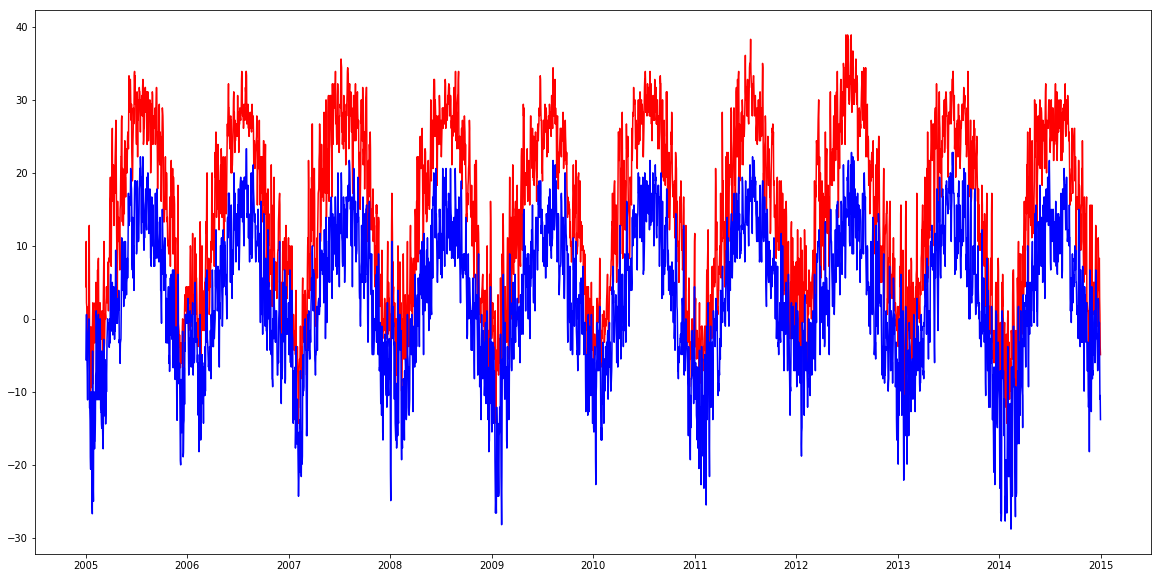

In [84]:
plt.figure(figsize=(20,10))
plt.plot(df_tmax['date'].values, df_tmax['temp'].values, 'r')
plt.plot(df_tmin['date'].values, df_tmin['temp'].values, 'b')

plt.fill_between(df_tmax['date'], df_tmax['temp'].values, df_tmin['temp'].values, color='green', alpha=0.2)

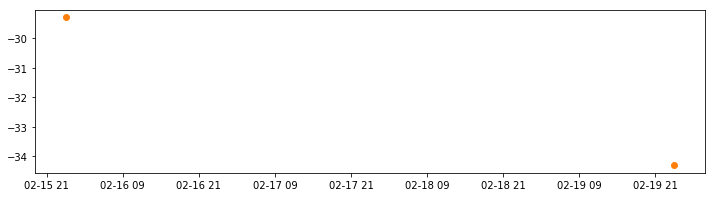

In [74]:
# Plot scatter plot of the 2015 data for any points (highs and lows)
# for which the ten year record (2005-2014) record high or record low 
# was broken in 2015.

mask = data2['s_id'] == 'USW00094889' 
data2 = data2[mask]
mask1 = data2['date'].dt.year == 2015
data2 = data2[mask1]

df_tmax_1 = data2[data2['element_type'] == 'TMAX']
mask2 = df_tmax_1['temp'] > df_tmax['temp'].max()
df_tmax_1 = df_tmax_1[mask2]

df_tmin_1 = data2[data2['element_type'] == 'TMIN']
mask3 = df_tmin_1['temp'] < df_tmin['temp'].min()
df_tmin_1 = df_tmin_1[mask3]

df_tmax_1
df_tmin_1


fig, ax = plt.subplots(figsize=(12,3))
ax.plot_date(df_tmax_1['date'], df_tmax_1['temp'])
ax.plot_date(df_tmin_1['date'], df_tmin_1['temp'])
